In [1]:
from skimage.measure import block_reduce
import numpy as np

import logging

from utils import logging as lg
lg.set_logging(logging.ERROR)
from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt



In [2]:
from utils import data_provider

In [3]:
dataset = {
    'mnist': data_provider.MNISTData(dir_path='../data/mnist'),
    'fashion-mnist': data_provider.FashionMNISTData(dir_path='../data/fashion-mnist'),
    'ufi-cropped': data_provider.UFICroppedData(dir_path='../data/ufi-cropped')
}

In [4]:
def model_path(network, dataset, seq):
    return '../final-models/%s_network-%s-seq-%d' % (network, dataset, seq)

In [61]:
def plot_apoc(networks, dataset_name, seq):
    data = dataset[dataset_name]
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    labels = []
    last_values = []
    for m in networks:
        path = model_path(m, dataset_name, seq)
        model_obj = provider.load(model_path(m, dataset_name, seq))
        apoc = heatmap_evaluation.aopc(model_obj, data.test2d.x[:10])   
        name = provider.network_nickname(model_obj._.architecture_name)
        ax.plot(apoc, label=name)

        labels.append(name)
        last_values.append(apoc[-1])
    sorted_indices = np.argsort(-np.array(last_values))
    labels = np.array(labels)[sorted_indices]
    last_values = np.array(last_values)[sorted_indices]
    position = np.copy(last_values)
    ratio = 0.2
    for i in range(1, len(sorted_indices)):
        if position[i-1] - position[i] < ratio:
            position[i] = position[i] - ratio
                      
    for label, value, pos in zip(labels, last_values, position):
        ax.annotate(label,
                    xy=(len(apoc)-1,value),
                    xytext=(len(apoc)+1,pos),
                    textcoords='data',
                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3")
                   )
    plt.legend()
    plt.tight_layout()
    plt.title('AOPC of %s with seq-length=%d' % (dataset_name, seq))
    plt.show()

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-4/model.ckpt


2017-12-30 21:23:18,854 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-4/model.ckpt


2017-12-30 21:23:19,797 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-4/model.ckpt


2017-12-30 21:23:21,897 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-4/model.ckpt


2017-12-30 21:23:23,372 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/deep_4l_network-mnist-seq-4/model.ckpt


2017-12-30 21:23:25,981 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/deep_4l_network-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/deep_4l_network-mnist-seq-4/model.ckpt


2017-12-30 21:23:27,799 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/deep_4l_network-mnist-seq-4/model.ckpt


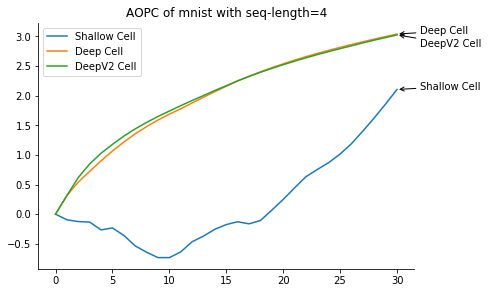

In [62]:
import imp
imp.reload(heatmap_evaluation)

plot_apoc(['s2', 's3', 'deep_4l'], 'mnist', 4)

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-4/model.ckpt


2017-12-30 20:51:00,412 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-4/model.ckpt


2017-12-30 20:51:03,663 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-4/model.ckpt


2017-12-30 20:51:19,930 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-4/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-4/model.ckpt


2017-12-30 20:51:23,331 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-4/model.ckpt


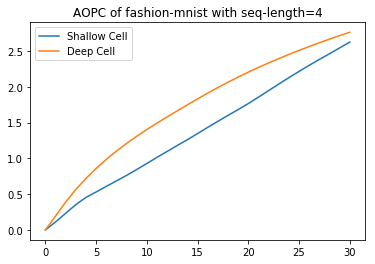

In [21]:
plot_apoc(['s2', 's3'], 'fashion-mnist', 4)

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-14/model.ckpt


2017-12-30 20:52:27,395 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-14/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-14/model.ckpt


2017-12-30 20:52:35,862 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-14/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-14/model.ckpt


2017-12-30 20:53:23,201 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-14/model.ckpt


INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-14/model.ckpt


2017-12-30 20:53:32,479 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-14/model.ckpt


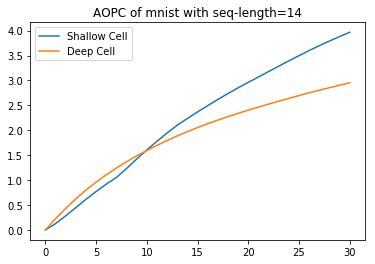

In [22]:
plot_apoc(['s2', 's3'], 'mnist', 14)

In [83]:
import imp
imp.reload(heatmap_evaluation)
model_obj = provider.load("../experiment-results/sprint-9-final-model-update2/s2_network-mnist-seq-1---2017-12-30--03-16-17")
res_lrp_s2 = heatmap_evaluation.aopc(model_obj, dataset['mnist'].test2d.x)

2017-12-30 04:47:54,220 | DEBUG : provider.py(load 9) - Load network from ../experiment-results/sprint-9-final-model-update2/s2_network-mnist-seq-1---2017-12-30--03-16-17
2017-12-30 04:47:54,224 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'max_seq_length': 28, 'val_accuracy': 0.9683333039283752, 'epoch': 10, 'seq_length': 1, 'accuracy': 0.9703999757766724, 'dataset': 'mnist', 'optimizer': 'AdamOptimizer', 'architecture_name': 's2_network', 'experiment_name': 's2_network-mnist-seq-1---2017-12-30--03-16-17', 'architecture': 'hidden:512||out:10--recur:256', 'regularizer': 0, 'lr': 0.0005, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'column_at_a_time': 28}
2017-12-30 04:47:54,226 | DEBUG : experiment_artifact.py(get_result 69) - {'max_seq_length': 28, 'val_accuracy': 0.9683333039283752, 'epoch': 10, 'seq_length': 1, 'accuracy': 0.9703999757766724, 'dataset': 'mnist', 'optimizer': 'AdamOptimizer', 'architecture_name': 's2_network', 'experiment_name': 's2_network-mnist-

INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-9-final-model-update2/s2_network-mnist-seq-1---2017-12-30--03-16-17/model.ckpt


2017-12-30 04:47:54,886 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-9-final-model-update2/s2_network-mnist-seq-1---2017-12-30--03-16-17/model.ckpt
2017-12-30 04:47:56,491 | INFO : heatmap_evaluation.py(aopc 23) - Using MoRF strategy


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-9-final-model-update2/s2_network-mnist-seq-1---2017-12-30--03-16-17/model.ckpt


2017-12-30 04:47:56,594 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-9-final-model-update2/s2_network-mnist-seq-1---2017-12-30--03-16-17/model.ckpt


[ -0.          -0.           0.           0.          -0.          -0.          -0.
  14.30588722  -0.           0.        ] [-0.        -0.        -0.         0.        -0.        -0.        -0.
  5.4533596  0.         0.       ]
7.6499546875
---
[ -0.          -0.           0.           0.          -0.          -0.          -0.
  14.30588722  -0.           0.        ] [-0.        -0.        -0.         0.        -0.        -0.        -0.
  2.4294703  0.         0.       ]
11.8429859375
---
[ -0.          -0.           0.           0.          -0.          -0.          -0.
  14.30588722  -0.           0.        ] [-0.         -0.         -0.         -0.         -0.         -0.         -0.
  0.30458584  0.         -0.        ]
14.2591953125
---
[ -0.          -0.           0.           0.          -0.          -0.          -0.
  14.30588722  -0.           0.        ] [-0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.84899205  0.         -0.        ]
15.79

In [81]:
model2 = provider.load("../experiment-results/sprint-9-deep4l-aws/deep_4l_network-mnist-seq-1---2017-12-30--02-12-20")
res_deep_4l = heatmap_evaluation.aopc(model2, dataset['mnist'].test2d.x)

2017-12-30 04:45:05,391 | DEBUG : provider.py(load 9) - Load network from ../experiment-results/sprint-9-deep4l-aws/deep_4l_network-mnist-seq-1---2017-12-30--02-12-20
2017-12-30 04:45:05,396 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'max_seq_length': 28, 'val_accuracy': 0.9769166707992554, 'epoch': 100, 'seq_length': 1, 'accuracy': 0.9787999987602234, 'dataset': 'mnist', 'optimizer': 'AdamOptimizer', 'architecture_name': 'deep_4l_network', 'experiment_name': 'deep_4l_network-mnist-seq-1---2017-12-30--02-12-20', 'architecture': 'in1:512|in2:256|hidden:128|out1:64|out2:10--recur:128', 'regularizer': 0.0, 'lr': 0.0001, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'column_at_a_time': 28}
2017-12-30 04:45:05,397 | DEBUG : experiment_artifact.py(get_result 69) - {'max_seq_length': 28, 'val_accuracy': 0.9769166707992554, 'epoch': 100, 'seq_length': 1, 'accuracy': 0.9787999987602234, 'dataset': 'mnist', 'optimizer': 'AdamOptimizer', 'architecture_name': 'deep_4l_network'

INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-9-deep4l-aws/deep_4l_network-mnist-seq-1---2017-12-30--02-12-20/model.ckpt


2017-12-30 04:45:06,443 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-9-deep4l-aws/deep_4l_network-mnist-seq-1---2017-12-30--02-12-20/model.ckpt
2017-12-30 04:45:08,651 | INFO : heatmap_evaluation.py(aopc 23) - Using MoRF strategy


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-9-deep4l-aws/deep_4l_network-mnist-seq-1---2017-12-30--02-12-20/model.ckpt


2017-12-30 04:45:08,823 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-9-deep4l-aws/deep_4l_network-mnist-seq-1---2017-12-30--02-12-20/model.ckpt


1.65847
2.17708
2.39353
2.49122
2.54228
2.57411
2.59627
2.61397
2.63006
2.64661
2.66848
2.70354
2.73857
2.76293
2.77494
2.78708
2.79517
2.80806
2.81793
2.82451
2.8256
2.82988
2.83292
2.83769
2.85103
2.86944
2.89394
2.92714
2.96611
3.01243


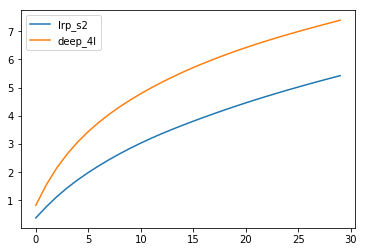

In [78]:
plt.plot(res_lrp_s2, label='lrp_s2')
plt.plot(res_deep_4l, label='deep_4l')
plt.legend()
plt.show()

In [13]:
res_deep_4l

array([-0.05120756, -0.11789049, -0.19025176, -0.26169612, -0.33127968,
       -0.40599685, -0.47847533, -0.54790649, -0.61384739, -0.67582718,
       -0.73377315, -0.78744397, -0.83769253, -0.88503731, -0.92962244,
       -0.97166363, -1.01142991, -1.04920502, -1.08521939, -1.1195871 ,
       -1.1524187 , -1.18382468, -1.21392225, -1.24281699, -1.27058973,
       -1.29730938, -1.3230366 , -1.34787341, -1.37186755, -1.39501197])

In [17]:
rel_patches = block_reduce(dataset['mnist'].test2d.x, block_size=(1, 4, 4), func=np.sum)

In [21]:
rel_patches_flatted = rel_patches.reshape(10000, -1)

In [22]:
k = 40

In [24]:
ranks = np.argsort(-rel_patches_flatted, axis=1)

In [27]:
rel_patches_flatted[0, ranks[0, :k]]

array([  3.59215686,   3.2627451 ,   2.30588235,  -0.36862745,
        -3.48235294,  -4.94117647,  -5.81960784,  -6.56470588,
        -7.74117647,  -8.50980392, -10.84705882, -12.81568627,
       -13.89019608, -14.71372549, -15.00392157, -15.7254902 ,
       -16.        , -16.        , -16.        , -16.        ,
       -16.        , -16.        , -16.        , -16.        ,
       -16.        , -16.        , -16.        , -16.        ,
       -16.        , -16.        , -16.        , -16.        ,
       -16.        , -16.        , -16.        , -16.        ,
       -16.        , -16.        , -16.        , -16.        ])

In [28]:
ranks[0, :k]

array([18, 38, 25, 17, 16, 32, 45, 19, 44, 31, 15,  9,  8, 37, 26, 39, 34,
       33, 30,  0, 36, 40, 41, 42, 43, 46, 35, 29, 24, 27,  1,  2,  3,  4,
        5,  6,  7, 10, 11, 12])

In [43]:
kernel = (7,7)
arr = np.array([18, 38, 25, 17])

In [45]:
ii = np.floor( arr / kernel[0] )
ii

array([ 2.,  5.,  3.,  2.])

In [46]:
jj = arr % kernel[1]
jj

array([4, 3, 4, 3])

In [49]:
rel_patches[0, 5, 3]

3.2627450980392152

In [54]:
iii = int(ii[0]*4)
jjj = int(jj[0]*4)

iii,jjj

(8, 16)

In [56]:
np.sum(dataset['mnist'].test2d.x[0, iii:iii+4, jjj:jjj+4])

3.5921568627450986

In [51]:
a = np.array([1,2,3,6,5,2,7,6,8]).reshape(3,3)

In [52]:
a

array([[1, 2, 3],
       [6, 5, 2],
       [7, 6, 8]])

In [57]:
np.argmax(a, axis=1).reshape(-1,1)

array([[2],
       [0],
       [2]])

In [58]:
m  = np.zeros((3,3))

In [65]:
mark = a == np.max(a, axis=1).reshape(-1,1)

In [64]:
np.max(a, axis=1).reshape(-1, 1)

array([[3],
       [6],
       [8]])

In [66]:
mark

array([[False, False,  True],
       [ True, False, False],
       [False, False,  True]], dtype=bool)

In [67]:
mark * a

array([[0, 0, 3],
       [6, 0, 0],
       [0, 0, 8]])